In [1]:
import os
import pandas as pd
import random
all_files=os.listdir('最终数据')
random.shuffle(all_files)
train_files=all_files[0:2410]

In [10]:
from sklearn.preprocessing import scale
import numpy as np
x_train = []
y_train = []
dict={}
for temp_train in train_files:
    temp_train_data=pd.read_csv('最终数据/'+str(temp_train))
    temp_train_data=temp_train_data[['grossprofit_margin','roe','roa','longdebt_to_workingcapital',
                    'q_sales_yoy','q_op_yoy','equity_yoy','turnover_rate',
                        'bp','ep','sp']]
    dict[temp_train+'mean']=np.array(list(np.mean(temp_train_data)))
    dict[temp_train+'std']=np.std(list(temp_train_data))
    temp_train_data=temp_train_data.values
    temp_train_data=scale(temp_train_data,axis=0)
    if temp_train_data.shape[0]<=9:
        continue
    for i in range(8,temp_train_data.shape[0]):
        x_train.append(temp_train_data[i - 8:i, ])
        y_train.append(temp_train_data[i, ])

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [11]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], 8, 11))

In [12]:
import tensorflow as tf
from tensorflow.python.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RNN
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
model = tf.keras.Sequential([
    SimpleRNN(8, return_sequences=True,activation='relu'),
    Dense(33,activation='tanh'),
    Dropout(0.2),
    SimpleRNN(100,activation='elu'),
    Dense(22),
    Dropout(0.2),
    Dense(11,)
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

In [13]:
with tf.device('/gpu:0'):
    history = model.fit(x_train, y_train, batch_size=64, epochs=15)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [14]:
model.summary()

file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8, 8)              160       
_________________________________________________________________
dense (Dense)                (None, 8, 33)             297       
_________________________________________________________________
dropout (Dropout)            (None, 8, 33)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13400     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                2222      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2

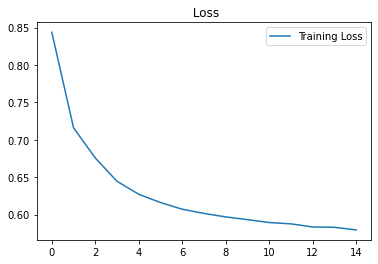

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title(' Loss')
plt.legend()
plt.show()

In [16]:
checkpoint=tf.train.Checkpoint(model=model)
checkpoint.save('model_save/model.ckpt')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StaticRegexFullMatch in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StringJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShardedFilename in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

'model_save/model.ckpt-1'

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8, 8)              160       
_________________________________________________________________
dense (Dense)                (None, 8, 33)             297       
_________________________________________________________________
dropout (Dropout)            (None, 8, 33)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13400     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                2222      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2

In [19]:
from sklearn.preprocessing import scale
predict_x = []
predict_y = []
name = []
for temp_train in train_files:
    temp_train_data=pd.read_csv('最终数据/'+str(temp_train))
    temp_train_data=temp_train_data[['grossprofit_margin','roe','roa','longdebt_to_workingcapital',
                    'q_sales_yoy','q_op_yoy','equity_yoy','turnover_rate',
                        'bp','ep','sp']]
    length=temp_train_data.shape[0]
    temp_train_data=temp_train_data.values
    temp_train_data=scale(temp_train_data,axis=0)
    if temp_train_data.shape[0]<=9:
        continue
    predict_x.append(temp_train_data[length - 9:length-1, ])
    name.append(str(temp_train))

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [24]:
predict_x = np.array(predict_x)
predict_x = np.reshape(predict_x, (predict_x.shape[0], 8, 11))

In [25]:
print(predict_x.shape[0])

2208


In [26]:
result=model.predict( predict_x, batch_size=32, verbose=0)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [27]:
print(result.shape)
print(len(name))

(2208, 11)
2208


In [36]:
print(type(result))
final=pd.DataFrame(result)
final.columns=['grossprofit_margin','roe','roa','longdebt_to_workingcapital',
                    'q_sales_yoy','q_op_yoy','equity_yoy','turnover_rate',
                        'bp','ep','sp']
final['company_code']=name

<class 'numpy.ndarray'>


In [46]:
for i in range(final.shape[0]):
    final.iloc[i,:11]=final.iloc[i,:11]*np.array(dict[str(final.iloc[i,11])+'std'])+np.array(dict[str(final.iloc[i,11])+'mean'])

In [48]:
final

,grossprofit_margin,roe,roa,longdebt_to_workingcapital,q_sales_yoy,q_op_yoy,equity_yoy,turnover_rate,bp,ep,sp,company_code
0,18.100632,0.906752,1.884893,0.577009,6.651395,-53.456924,4.554793,1.511274,0.310757,0.023237,0.483660,002119.csv
1,53.373650,11.022848,10.530272,0.026991,18.292271,24.808235,12.554452,0.912451,0.087508,0.019083,0.048185,002690.csv
2,17.349272,5.255134,4.169516,0.115941,43.109711,895.650330,16.674807,5.445607,0.319872,0.004351,0.416642,300221.csv
3,40.589489,9.615835,6.087455,0.530962,13.721315,31.408722,15.900151,1.501004,0.755039,0.113691,0.692225,603458.csv
4,18.604742,2.328728,1.831847,0.242155,13.801826,-2235.891113,-2.290161,1.092116,0.284165,0.027622,0.156592,002476.csv
...,...,...,...,...,...,...,...,...,...,...,...,...
2203,24.579912,1.748353,1.175054,0.462647,12.546094,41.604820,145.531555,2.747406,0.261431,0.022323,0.264352,002013.csv
2204,25.338564,6.170020,3.798259,0.029737,43.391422,17.110739,12.074432,1.112688,1.015756,0.108326,1.252329,600757.csv
2205,26.312212,11.546153,8.039266,0.155625,17.446562,31.574076,20.194860,1.454001,0.187800,0.036308,0.234197,600486.csv
2206,48.635612,8.123599,7.138405,0.188760,31.724770,59.808537,30.285196,1.409580,0.092254,0.014349,0.083608,300012.csv


In [49]:
final.to_csv('yinzi_predict.csv',index=False)